In [6]:
import numpy as np
import matplotlib.pyplot as plt
from preamble import *
import pandas as pd
import mglearn
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
import sklearn
from matplotlib import font_manager, rc
%matplotlib inline
font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)



In [7]:
 from preamble import *
%matplotlib inline
import numpy as np
from scipy import sparse
import matplotlib.pyplot as plt
import pandas as pd


In [8]:
%load_ext watermark
%watermark -v -p sklearn,numpy,scipy,matplotlib

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Python implementation: CPython
Python version       : 3.7.6
IPython version      : 7.12.0

sklearn   : 0.22.1
numpy     : 1.18.1
scipy     : 1.4.1
matplotlib: 3.1.3



In [9]:
import os
## os를 제어

data = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "adult.data"), header=None, index_col=False,
names=['age', 'workclass', 'fnlwgt', 'education','education-num', 'marital-status','occupation',
       'relationship','race','gender','capital-gain','capital-loss', 'hours-per-week'
       ,'native-country','income'])
data = data[['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation','income']]

display(data.head())

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


In [11]:
#data = pd.read_csv()
data = data[['age', 'workclass', 'education', 'gender','hours-per-week', 
             'occupation', 'income']]

print(data.gender.value_counts())

 Male      21790
 Female    10771
Name: gender, dtype: int64


In [13]:
data_dummies = pd.get_dummies(data)
print(data_dummies)

       age  hours-per-week  workclass_ ?  workclass_ Federal-gov  ...  \
0       39              40             0                       0  ...   
1       50              13             0                       0  ...   
2       38              40             0                       0  ...   
3       53              40             0                       0  ...   
4       28              40             0                       0  ...   
...    ...             ...           ...                     ...  ...   
32556   27              38             0                       0  ...   
32557   40              40             0                       0  ...   
32558   58              40             0                       0  ...   
32559   22              20             0                       0  ...   
32560   52              40             0                       0  ...   

       occupation_ Tech-support  occupation_ Transport-moving  income_ <=50K  \
0                             0            

In [15]:
#타겟값 제외
features = data_dummies.loc[:, 'age':'occupation_ Transport-moving']
# NumPy 배열 추출
X = features.values
y = data_dummies['income_ >50K'].values
print("X.shape: {} y.shape: {}".format(X.shape, y.shape))


X.shape: (32561, 44) y.shape: (32561,)


In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print("테스트 점수: {:.2f}".format(logreg.score(X_test,y_test)))
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
print("테스트 점수: {:.2f}".format(knn.score(X_test,y_test)))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


테스트 점수: 0.81
테스트 점수: 0.77


In [24]:
demo_df = pd.DataFrame({'숫자 특성':[0,1,2,1], '범주형 특성':['양말','여우','양말','상자']})
display(demo_df)

,숫자 특성,범주형 특성
0,0,양말
1,1,여우
2,2,양말
3,1,상자


In [25]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)
print(ohe.fit_transform(demo_df))

[[1. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 1.]
 [0. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 0.]]


In [26]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

ct = ColumnTransformer(
[("scaling", StandardScaler(), ['age', 'hours-per-week']), 
 ("onehot", OneHotEncoder(sparse=False),
['workclass','education', 'gender', 'occupation'])])

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
#income을 제외한 모든 열을 추출합니다.
data_features = data.drop("income", axis=1)
# 데이터프레임과 income을 분할합니다
X_train, X_test, y_train, y_test = train_test_split(data_features, data.income, 
                                                    random_state=0)
ct.fit(X_train)
X_train_trans = ct.transform(X_train)
print(X_train_trans.shape)


(24420, 44)


In [28]:
logreg = LogisticRegression()
logreg.fit(X_train_trans, y_train)

X_test_trans = ct.transform(X_test)
print("테스트 점수: {:.2f}".format(logreg.score(X_test_trans, y_test)))

테스트 점수: 0.81


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [29]:
ct.named_transformers_.onehot

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=False)

In [31]:
from sklearn.compose import make_column_transformer
#이름을 알아서 정해줌
ct = make_column_transformer(
(StandardScaler(), ['age', 'hours-per-week']), (OneHotEncoder(sparse=False), ['workclass', 'education', 'gender', 'occupation']))
print(ct)

ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('standardscaler',
                                 StandardScaler(copy=True, with_mean=True,
                                                with_std=True),
                                 ['age', 'hours-per-week']),
                                ('onehotencoder',
                                 OneHotEncoder(categories='auto', drop=None,
                                               dtype=<class 'numpy.float64'>,
                                               handle_unknown='error',
                                               sparse=False),
                                 ['workclass', 'education', 'gender',
                                  'occupation'])],
                  verbose=False)


In [34]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import MinMaxScaler
column_trans = make_column_transformer(
(OneHotEncoder(), ['city']),
(CountVectorizer(), 'title'),
remainder=MinMaxScaler())
column_trans
ColumnTransformer(remainder=MinMaxScaler(),
transformers=[('onehotencoder', OneHotEncoder(), ['city']),
('countvectorizer', CountVectorizer(), 'title')])

ColumnTransformer(n_jobs=None,
                  remainder=MinMaxScaler(copy=True, feature_range=(0, 1)),
                  sparse_threshold=0.3, transformer_weights=None,
                  transformers=[('onehotencoder',
                                 OneHotEncoder(categories='auto', drop=None,
                                               dtype=<class 'numpy.float64'>,
                                               handle_unknown='error',
                                               sparse=True),
                                 ['city']),
                                ('countvectorizer',
                                 CountVectorizer(analyzer='word', binary=False,
                                                 decode_error='strict',
                                                 dtype=<class 'numpy.int64'>,
                                                 encoding='utf-8',
                                                 input='content',
                                

score: 0.63
score: 0.86


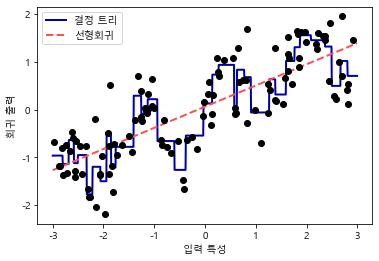

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

X, y = mglearn.datasets.make_wave(n_samples=120)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)

dreg = DecisionTreeRegressor(min_samples_leaf=3) .fit(X, y)
plt.plot(line, dreg.predict(line), label="결정 트리")

lreg = LinearRegression().fit(X, y)
plt.plot(line, lreg.predict(line), '--', label="선형회귀")


plt.plot(X[:, 0], y, 'o', c='k') 
plt.ylabel("회귀 출력") 
plt.xlabel("입력 특성")
plt.legend(loc="best")
print("score: {:.2f}".format(lreg.score(X, y)))
print("score: {:.2f}".format(dreg.score(X, y)))

In [44]:
#연속형 데이터를 구간 데이터로 변경(binning or 이산화)
from sklearn.preprocessing import KBinsDiscretizer
kb = KBinsDiscretizer(n_bins=10, strategy='uniform', encode = 'onehot-dense')
kb.fit(X)
X_binned = kb.transform(X)

print(X[:10])
print(X_binned[:10])

[[-0.753]
 [ 2.704]
 [ 1.392]
 [ 0.592]
 [-2.064]
 [-2.064]
 [-2.651]
 [ 2.197]
 [ 0.607]
 [ 1.248]]
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


Linear Regression score: 0.72
DecisionTreeRegressor score: 0.72


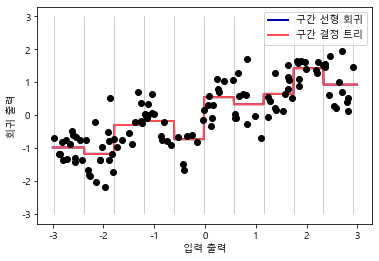

In [50]:
line_binned = kb.transform(line) 

lreg = LinearRegression().fit(X_binned, y) 
plt.plot(line, lreg.predict(line_binned), label= "구간 선형 회귀")

dreg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, y) 
plt.plot(line, dreg.predict(line_binned), label='구간 결정 트리')
plt.plot(X[:, 0], y, 'o', c='k') 
plt.vlines(kb.bin_edges_[0], -3, 3, linewidth=1, alpha=.2)
plt.legend(loc="best") 
plt.ylabel("회귀 출력")
plt.xlabel("입력 출력") 
print("Linear Regression score: {:.2f}".format(lreg.score(X_binned, y))) 
print("DecisionTreeRegressor score: {:.2f}".format(dreg.score(X_binned, y))) 
#구간으로 변환 하여  one-hot-encoding 후 구간별 예측 값이 상수값
# Score 차이가 없다.
#결정트리는 특성별로 가장 좋은 구간을 학습하므로 구간 나누기가 별 도움이 되지 않는다.
#일부특성과 출력이 비선형이면서 용량이 크고, 고차우너데이터의 선형모델에 구축시 구간 나누기가 유용

In [51]:
X_combined = np.hstack([X, X_binned])
print(X_combined.shape)
print(X_combined[:5])

(120, 11)
[[-0.753  0.     0.     0.     1.     0.     0.     0.     0.     0.
   0.   ]
 [ 2.704  0.     0.     0.     0.     0.     0.     0.     0.     0.
   1.   ]
 [ 1.392  0.     0.     0.     0.     0.     0.     0.     1.     0.
   0.   ]
 [ 0.592  0.     0.     0.     0.     0.     0.     1.     0.     0.
   0.   ]
 [-2.064  0.     1.     0.     0.     0.     0.     0.     0.     0.
   0.   ]]


In [52]:
X_product = np.hstack([X_binned, X * X_binned])
print(X_product.shape)
print(X_product[:5])

(120, 20)
[[ 0.     0.     0.     1.     0.     0.     0.     0.     0.     0.
  -0.    -0.    -0.    -0.753 -0.    -0.    -0.    -0.    -0.    -0.   ]
 [ 0.     0.     0.     0.     0.     0.     0.     0.     0.     1.
   0.     0.     0.     0.     0.     0.     0.     0.     0.     2.704]
 [ 0.     0.     0.     0.     0.     0.     0.     1.     0.     0.
   0.     0.     0.     0.     0.     0.     0.     1.392  0.     0.   ]
 [ 0.     0.     0.     0.     0.     0.     1.     0.     0.     0.
   0.     0.     0.     0.     0.     0.     0.592  0.     0.     0.   ]
 [ 0.     1.     0.     0.     0.     0.     0.     0.     0.     0.
  -0.    -2.064 -0.    -0.    -0.    -0.    -0.    -0.    -0.    -0.   ]]


In [56]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=10, include_bias=False) #X **10
poly.fit(X)
X_poly = poly.transform(X) #X_poly.shape: (120, 10)
print(X_poly)

[[   -0.753     0.567    -0.427 ...     0.103    -0.078     0.058]
 [    2.704     7.313    19.777 ...  2860.36   7735.232 20918.278]
 [    1.392     1.938     2.697 ...    14.094    19.618    27.307]
 ...
 [   -1.881     3.537    -6.651 ...   156.435  -294.188   553.245]
 [    2.355     5.548    13.067 ...   947.217  2231.031  5254.869]
 [    0.236     0.056     0.013 ...     0.        0.        0.   ]]


In [58]:
lreg = LinearRegression().fit(X_poly, y) 
print("score:", lreg.score(X_poly,y))
from sklearn.svm import SVR

svr = SVR(gamma = 1).fit(X,y)
print(svr.score(X,y))
svr = SVR(gamma = 10).fit(X,y)
print(svr.score(X,y))

score: 0.7346894080529944
0.754165853312546
0.7872376732593508


In [60]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target,
                                                    random_state=0)

# 데이터 스케일 조정
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [61]:
# 다항식으로 특성 변환
poly = PolynomialFeatures(degree=2).fit(X_train_scaled)
X_train_poly = poly.transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

print("X_train.shape:", X_train.shape)
#중복을 고려한 조합
print("X_train_poly.shape:", X_train_poly.shape)

X_train.shape: (379, 13)
X_train_poly.shape: (379, 105)


In [62]:
print(X_train_poly)

[[1.    0.002 0.22  ... 0.961 0.465 0.225]
 [1.    0.001 0.25  ... 1.    0.212 0.045]
 [1.    0.001 0.4   ... 0.962 0.12  0.015]
 ...
 [1.    0.002 0.    ... 0.988 0.242 0.059]
 [1.    0.003 0.    ... 0.979 0.479 0.235]
 [1.    0.001 0.    ... 1.    0.368 0.135]]


In [63]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train_scaled, y_train)
print("상호작용 특성이 없을 때 점수: {:.3f}".format(ridge.score(X_test_scaled, y_test)))
ridge = Ridge().fit(X_train_poly, y_train)
print("상호작용 특성이 있을 때 점수: {:.3f}".format(ridge.score(X_test_poly, y_test)))

#상호작용이 있을 때 성능이 향상됨

상호작용 특성이 없을 때 점수: 0.621
상호작용 특성이 있을 때 점수: 0.753


In [64]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=0).fit(X_train_scaled, y_train)
print("상호작용 특성이 없을 때 점수: {:.3f}".format(rf.score(X_test_scaled, y_test)))
rf = RandomForestRegressor(n_estimators=100, random_state=0).fit(X_train_poly, y_train)
print("상호작용 특성이 있을 때 점수: {:.3f}".fo rmat(rf.score(X_test_poly, y_test)))

#상호작용이 있어도 성능이 향상되지 않음

상호작용 특성이 없을 때 점수: 0.795
상호작용 특성이 있을 때 점수: 0.774


In [66]:
rnd = np.random.RandomState(0)
X_org = rnd.normal(size=(1000, 3))
w = rnd.normal(size=3)
print(X_org[:50, 0])
X = rnd.poisson(10 * np.exp(X_org)) #포아송 분포 데이터 생성
y = np.dot(X_org, w) #원데이터와 w로 y값 생성
print(X[:50, 0])

[ 1.764  2.241  0.95   0.411  0.761  0.334  0.313  0.654  2.27  -0.187
  0.155 -1.981  1.23  -0.302 -1.706 -0.438 -1.614  0.387 -0.028  0.302
 -0.672 -1.726 -1.63   0.052  1.139 -0.685 -0.312  0.901  1.488 -0.18
 -0.403  0.977  0.011  0.402 -1.27   1.944  1.923  0.906 -0.268 -0.155
  0.376  1.326 -0.435  0.407 -0.674  0.676  0.396  0.439  2.383  1.117]
[ 56  81  25  20  27  18  12  21 109   7  15   1  27   4   1   7   2  11
   6  18   1   2   2   7  31   7   7  28  37   9   8  21   7  20   3  71
  69  27   9   7  12  43   9  18   4  21  16  12 120  33]


In [68]:
print("특성 출현 횟수:\n", np.bincount(X[:, 0].astype('int')))

특성 출현 횟수:
 [28 38 68 48 61 59 45 56 37 40 35 34 36 26 23 26 27 21 23 23 18 21 10  9
 17  9  7 14 12  7  3  8  4  5  5  3  4  2  4  1  1  3  2  5  3  8  2  5
  2  1  2  3  3  2  2  3  3  0  1  2  1  0  0  3  1  0  0  0  1  3  0  1
  0  2  0  1  1  0  0  0  0  1  0  0  2  2  0  1  1  0  0  0  0  1  1  0
  0  0  0  0  0  0  1  0  0  0  0  0  1  1  0  0  1  0  0  0  0  0  0  0
  1  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]


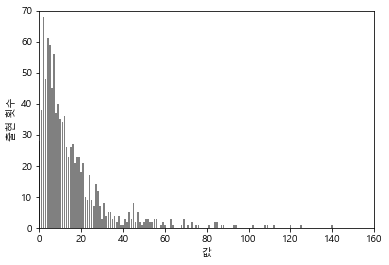

In [69]:
plt.xlim(0, 160)
plt.ylim(0, 70)
bins = np.bincount(X[:, 0])
plt.bar(range(len(bins)), bins, color='grey')
plt.ylabel("출현 횟수")
plt.xlabel("값")
plt.show()

In [70]:
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
score = Ridge().fit(X_train, y_train).score(X_test, y_test)
print("테스트 점수: {:.3f}".format(score))
#R2값: 비선형 관계


테스트 점수: 0.622


In [71]:
#로그 변환
#단위가 다른 특징이 섞여 있을 때 큰 단위를 작은 단위로 변환하여 왜곡을 줄인다
X_train_log = np.log(X_train + 1)
X_test_log = np.log(X_test + 1)

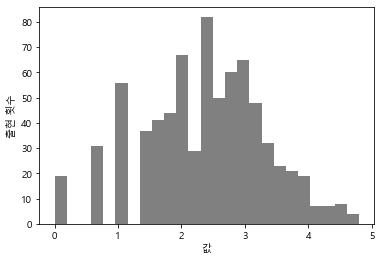

In [72]:
plt.hist(X_train_log[:, 0], bins=25, color='gray')
plt.ylabel("출현 횟수")
plt.xlabel("값")
plt.show() # 책에는 없음

In [73]:
score = Ridge().fit(X_train_log, y_train).score(X_test_log, y_test)
print("테스트 점수: {:.3f}".format(score))
#전치리 결과 성능이 많이 올라감 

테스트 점수: 0.875


In [97]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

# 고정된 난수를 발생시킵니다
rng = np.random.RandomState(42)
#암 데이터에 50개의 노이즈를 추가
noise = rng.normal(size=(len(cancer.data), 50))
# 데이터에 노이즈 특성을 추가합니다
# 처음 30개는 원본 특성이고 다음 50개는 노이즈입니다
X_w_noise = np.hstack([cancer.data, noise]) #총 80개의 특성이 만들어짐

X_train, X_test, y_train, y_test = train_test_split(
    X_w_noise, cancer.target, random_state=0, test_size=.5)
# f_classif(기본값)와 SelectPercentile을 사용하여 특성의 50%를 선택합니다
select = SelectPercentile(score_func=f_classif, percentile=50)
select.fit(X_train, y_train)
# 훈련 세트에 적용합니다
X_train_selected = select.transform(X_train)

print("X_train.shape:", X_train.shape)
print("X_train_selected.shape:", X_train_selected.shape)
#선택된 특성수가 적다

X_train.shape: (284, 80)
X_train_selected.shape: (284, 40)


[ True  True  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True False False False  True False  True
 False False  True False False False False  True False False  True False
 False  True False  True False False False False False False  True False
  True False False False False  True False  True False False False False
  True  True False  True False False False False]


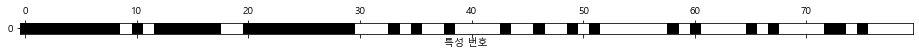

In [75]:
mask = select.get_support()
print(mask)
# True는 검은색, False는 흰색으로 마스킹합니다
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("특성 번호")
plt.yticks([0])
plt.show()
#원본의 특성이 일부 포함되지 않았음을 알 수있다

In [76]:
from sklearn.linear_model import LogisticRegression

# 테스트 데이터 변환
X_test_selected = select.transform(X_test)

lr = LogisticRegression(max_iter=5000)
lr.fit(X_train, y_train)
print("전체 특성을 사용한 점수: {:.3f}".format(lr.score(X_test, y_test)))
lr.fit(X_train_selected, y_train)
print("선택된 일부 특성을 사용한 점수: {:.3f}".format(
        lr.score(X_test_selected, y_test)))

전체 특성을 사용한 점수: 0.951
선택된 일부 특성을 사용한 점수: 0.933


In [95]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0, test_size=.5)
#노이즈 추가전 데이터로 학습
lr = LogisticRegression(max_iter=5000)
lr.fit(X_train, y_train)
print("원본 데이터 사용한 점수: {:.3f}".format(
        lr.score(X_test, y_test)))
# f_classif(기본값)와 SelectPercentile을 사용하여 특성의 50%를 선택합니다
select = SelectPercentile(score_func=f_classif, percentile=60)
select.fit(X_train, y_train)
# 훈련 세트에 적용합니다
X_train_selected = select.transform(X_train)
lr = LogisticRegression(max_iter=5000)
lr.fit(X_train_selected, y_train)
X_test_selected = select.transform(X_test)
print("60% 특성을 사용한 점수: {:.3f}".format(
        lr.score(X_test_selected, y_test))) 

원본 데이터 사용한 점수: 0.958
60% 특성을 사용한 점수: 0.954


In [98]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
#특징 선택의 임계값: 특징 중요도의 중간 값
#트리 100개로 특징 선택
# 일변량 분석보다 강력, 복잡한 모델
select = SelectFromModel(
    RandomForestClassifier(n_estimators=100, random_state=42),
    threshold="median") 
#

In [99]:
select.fit(X_train, y_train)
X_train_l1 = select.transform(X_train)
print("X_train.shape:", X_train.shape)
print("X_train_l1.shape:", X_train_l1.shape)

X_train.shape: (284, 80)
X_train_l1.shape: (284, 40)


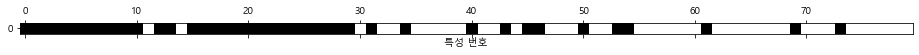

In [100]:
mask = select.get_support()
# True는 검은색, False는 흰색으로 마스킹합니다
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("특성 번호")
plt.yticks([0])
plt.show() 
#

In [102]:
X_test_l1 = select.transform(X_test)
print(X_test_l1.shape)
score = LogisticRegression(max_iter=5000).fit(X_train_l1, y_train).score(X_test_l1, y_test)
print("테스트 점수: {:.3f}".format(score))
score = LogisticRegression(max_iter=5000).fit(X_train, y_train).score(X_test, y_test)
print("전체 데이터 썼을 떄: 점수", score)
# 특성만 뽑아서 학습 한 것이 정확도가 훨씬 좋음을 알 수 있음

(285, 40)
테스트 점수: 0.947
전체 데이터 썼을 떄: 점수 0.9508771929824561


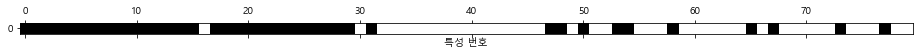

In [103]:
from sklearn.feature_selection import RFE
#40개의 특성이 포함될 때까지 계속 반복해서 모델을 만듬
select = RFE(RandomForestClassifier(n_estimators=100, random_state=42),
             n_features_to_select=40)

select.fit(X_train, y_train)
# 선택된 특성을 표시합니다
mask = select.get_support()
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("특성 번호")
plt.yticks([0])
plt.show() 

In [105]:
X_train_rfe = select.transform(X_train)
X_test_rfe = select.transform(X_test)
print(X_test_rfe.shape)
#40개의 특징을 사용했을 때
#특징 선택이 어려울 때 사용함
score = LogisticRegression(max_iter=5000).fit(X_train_rfe, y_train).score(X_test_rfe, y_test)
print("테스트 점수: {:.3f}".format(score))

(285, 40)
테스트 점수: 0.940


In [106]:
citibike = mglearn.datasets.load_citibike()

In [107]:
print("시티 바이크 데이터:\n", citibike.head())

시티 바이크 데이터:
 starttime
2015-08-01 00:00:00     3
2015-08-01 03:00:00     0
2015-08-01 06:00:00     9
2015-08-01 09:00:00    41
2015-08-01 12:00:00    39
Freq: 3H, Name: one, dtype: int64


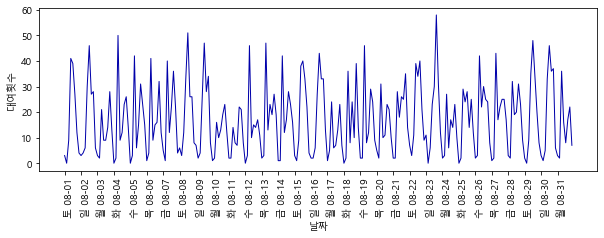

In [110]:
plt.figure(figsize=(10, 3))
xticks = pd.date_range(start=citibike.index.min(), end=citibike.index.max(),
                       freq='D')
week = ["일", "월", "화","수", "목", "금", "토"]
xticks_name = [week[int(w)]+d for w, d in zip(xticks.strftime("%w"), 
                                              xticks.strftime(" %m-%d"))]
plt.xticks(xticks, xticks_name, rotation=90, ha="left")
plt.plot(citibike, linewidth=1)
plt.xlabel("날짜")
plt.ylabel("대여횟수")
plt.show() # 책에는 없음

In [111]:
# 타깃값 추출 (대여 횟수)
y = citibike.values
# POSIX 시간을 10**9로 나누어 변경

X = citibike.index.astype("int64").values.reshape(-1, 1) // 10**9
#날짜와 시간을 하나의 숫자로 표현
print(X)

[[1438387200]
 [1438398000]
 [1438408800]
 [1438419600]
 [1438430400]
 [1438441200]
 [1438452000]
 [1438462800]
 [1438473600]
 [1438484400]
 [1438495200]
 [1438506000]
 [1438516800]
 [1438527600]
 [1438538400]
 [1438549200]
 [1438560000]
 [1438570800]
 [1438581600]
 [1438592400]
 [1438603200]
 [1438614000]
 [1438624800]
 [1438635600]
 [1438646400]
 [1438657200]
 [1438668000]
 [1438678800]
 [1438689600]
 [1438700400]
 [1438711200]
 [1438722000]
 [1438732800]
 [1438743600]
 [1438754400]
 [1438765200]
 [1438776000]
 [1438786800]
 [1438797600]
 [1438808400]
 [1438819200]
 [1438830000]
 [1438840800]
 [1438851600]
 [1438862400]
 [1438873200]
 [1438884000]
 [1438894800]
 [1438905600]
 [1438916400]
 [1438927200]
 [1438938000]
 [1438948800]
 [1438959600]
 [1438970400]
 [1438981200]
 [1438992000]
 [1439002800]
 [1439013600]
 [1439024400]
 [1439035200]
 [1439046000]
 [1439056800]
 [1439067600]
 [1439078400]
 [1439089200]
 [1439100000]
 [1439110800]
 [1439121600]
 [1439132400]
 [1439143200]
 [1439

In [112]:
# 처음 184개 데이터 포인트를 훈련 세트로 사용하고 나머지는 테스트 세트로 사용합니다
n_train = 184

# 주어진 특성을 사용하여 평가하고 그래프를 만듭니다
def eval_on_features(features, target, regressor):
    # 훈련 세트와 테스트 세트로 나눕니다
    X_train, X_test = features[:n_train], features[n_train:]
    # 타깃값도 나눕니다
    y_train, y_test = target[:n_train], target[n_train:]
    regressor.fit(X_train, y_train)
    print("테스트 세트 R^2: {:.2f}".format(regressor.score(X_test, y_test)))
    y_pred = regressor.predict(X_test)
    y_pred_train = regressor.predict(X_train)
    plt.figure(figsize=(10, 3))

    plt.xticks(range(0, len(X), 8), xticks_name, rotation=90, ha="left")

    plt.plot(range(n_train), y_train, label="훈련")
    plt.plot(range(n_train, len(y_test) + n_train), y_test, '-', label="테스트")
    plt.plot(range(n_train), y_pred_train, '--', label="훈련 예측")

    plt.plot(range(n_train, len(y_test) + n_train), y_pred, '--',
             label="테스트 예측")
    plt.legend(loc=(1.01, 0))
    plt.xlabel("날짜")
    plt.ylabel("대여횟수")

테스트 세트 R^2: -0.04


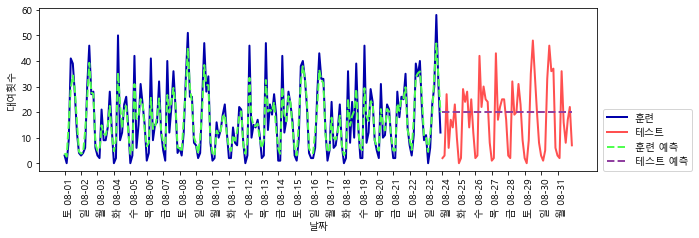

In [113]:
regressor = RandomForestRegressor(n_estimators=100, random_state=0)
eval_on_features(X, y, regressor)
#테스트 데이터의 특성 값이 훈련데이터의 특성값 밖에 있어서 하나도 예측이 되지 않았다

[[ 0]
 [ 3]
 [ 6]
 [ 9]
 [12]
 [15]
 [18]
 [21]
 [ 0]
 [ 3]]
테스트 세트 R^2: 0.60


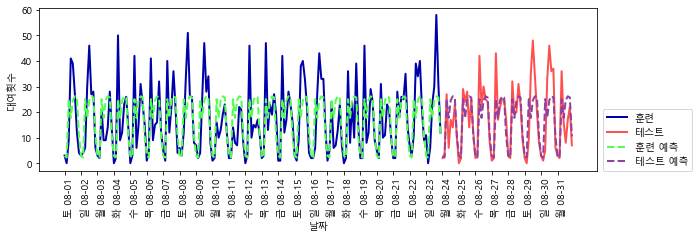

In [115]:
X_hour = citibike.index.hour.values.reshape(-1, 1)
print(X_hour[:10])
#데이터를 초단위에서 시간단위로 넣음
eval_on_features(X_hour, y, regressor)

테스트 세트 R^2: 0.84


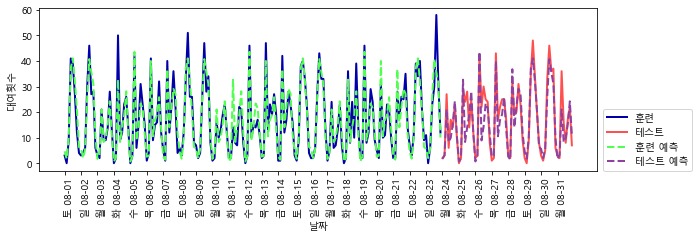

In [116]:
X_hour_week = np.hstack([citibike.index.dayofweek.values.reshape(-1, 1),
                         citibike.index.hour.values.reshape(-1, 1)])
#요일 데이터를 포함하여 성능 개선
eval_on_features(X_hour_week, y, regressor)

테스트 세트 R^2: 0.13


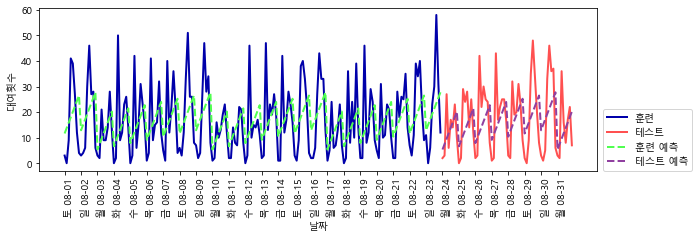

In [117]:
from sklearn.linear_model import LinearRegression
eval_on_features(X_hour_week, y, LinearRegression())
# 시간을 순수한 숫자로 받아들여서 연산에 이용하여 선형 증가 모델이 되버림

In [118]:
enc = OneHotEncoder()
X_hour_week_onehot = enc.fit_transform(X_hour_week).toarray()

테스트 세트 R^2: 0.62


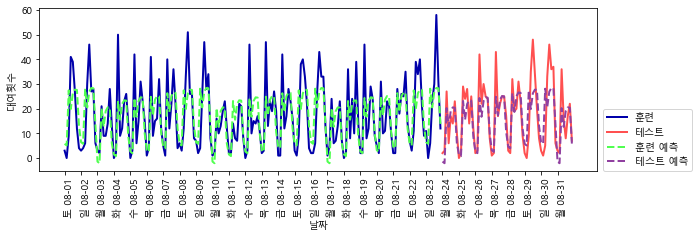

In [119]:
eval_on_features(X_hour_week_onehot, y, Ridge())

테스트 세트 R^2: 0.85


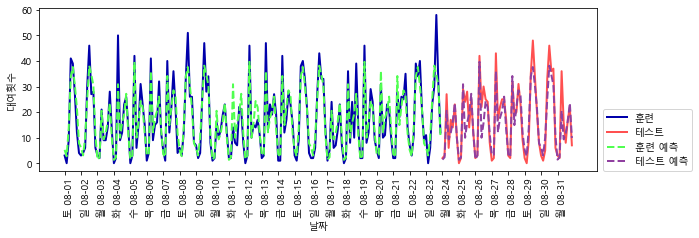

In [120]:
poly_transformer = PolynomialFeatures(degree=2, interaction_only=True,
                                      include_bias=False)
X_hour_week_onehot_poly = poly_transformer.fit_transform(X_hour_week_onehot)
lr = Ridge()
eval_on_features(X_hour_week_onehot_poly, y, lr)
#Polynomial를 이용헀을 떄, 릿지모델의 성능이 많이 개선됨

In [121]:
hour = ["%02d:00" % i for i in range(0, 24, 3)]
day = ["월", "화", "수", "목", "금", "토", "일"]
features =  day + hour

In [122]:
features_poly = poly_transformer.get_feature_names(features)
features_nonzero = np.array(features_poly)[lr.coef_ != 0]
coef_nonzero = lr.coef_[lr.coef_ != 0]

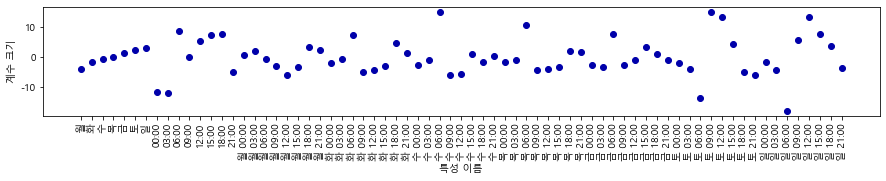

In [123]:
plt.figure(figsize=(15, 2))
plt.plot(coef_nonzero, 'o')
plt.xticks(np.arange(len(coef_nonzero)), features_nonzero, rotation=90)
plt.xlabel("특성 이름")
plt.ylabel("계수 크기")
plt.show() 

In [124]:
# 모델 평가와 특성공학

In [126]:
from sklearn.datasets import make_blobs

# 훈련 데이터 준비
X, y = make_blobs(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

logreg = LogisticRegression().fit(X_train, y_train)

print("테스트 세트 점수: {:.2f}".format(logreg.score(X_test, y_test)))

테스트 세트 점수: 0.88


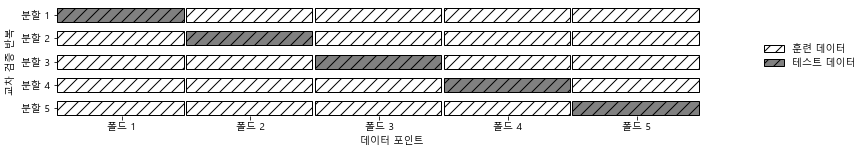

In [127]:
mglearn.plots.plot_cross_validation()
#k-겹 교차 검증(K-fold cross-validation )

In [130]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris()
logreg = LogisticRegression(max_iter=1000)

#cv : k 겹의 수 defailt는 5
scores = cross_val_score(logreg, iris.data, iris.target)
print("교차 검증 점수:", scores)

교차 검증 점수: [0.967 1.    0.933 0.967 1.   ]


In [129]:
scores = cross_val_score(logreg, iris.data, iris.target, cv=10)
print("교차 검증 점수:", scores)
#10겹이나 쓰기 때문에 모델이 훈련 데이터에 대한 민감도를 파악할 수있다
#90%를 훈련에 사용하기 때문에 비교적 정확한 평가를 얻는다

교차 검증 점수: [1.    0.933 1.    1.    0.933 0.933 0.933 1.    1.    1.   ]


In [ ]:
print("교차 검증 평균 점수: {:.2f}".format(scores.mean()))

In [ ]:
from sklearn.model_selection import cross_validate
res = cross_validate(logreg, iris.data, iris.target,
                     return_train_score=True)
display(res)

In [ ]:
res_df = pd.DataFrame(res)
display(res_df)
print("평균 시간과 점수:\n", res_df.mean())

In [133]:
from sklearn.datasets import load_iris
iris = load_iris()
from sklearn.model_selection import KFold
kfold = KFold(n_splits=3)
#데이터를 섞지않고 순서대로 되어있어서 학습되지 않는 클래스들이
#존재해버려서 제대로 학습못함
print("교차 검증 점수:\n",
      cross_val_score(logreg, iris.data, iris.target, cv=kfold))

교차 검증 점수:
 [0. 0. 0.]


In [134]:
#셔플해서 골고루 섞음
kfold = KFold(n_splits=3, shuffle=True, random_state=0)
print("교차 검증 점수:\n",
    cross_val_score(logreg, iris.data, iris.target, cv=kfold))

교차 검증 점수:
 [0.98 0.96 0.96]


In [136]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
scores = cross_val_score(logreg, iris.data, iris.target, cv=loo)
print("교차 검증 분할 횟수: ", len(scores))
print("평균 정확도: {:.2f}".format(scores.mean()))

교차 검증 분할 횟수:  150
평균 정확도: 0.97


In [141]:
from sklearn.model_selection import ShuffleSplit
# 사용할 비유을 지정해서 분할
shuffle_split = ShuffleSplit(test_size=.5, train_size=.5, n_splits=10)
scores = cross_val_score(logreg, iris.data, iris.target, cv=shuffle_split)
print("교차 검증 점수:\n", scores)
print("평균 정확도", scores.mean())

from sklearn.model_selection import StratifiedShuffleSplit
#클래스에서 일정 비율을 뽑아서 분할
shuffle_split = StratifiedShuffleSplit(test_size=.5, train_size=.5 , n_splits=10)
scores = cross_val_score(logreg, iris.data, iris.target, cv=shuffle_split)
print("교차 검증 점수:\n", scores)
print("평균 정확도", scores.mean())



교차 검증 점수:
 [0.96  0.96  0.96  0.973 0.96  0.987 0.947 0.947 0.987 0.987]
평균 정확도 0.9666666666666666
교차 검증 점수:
 [0.987 0.947 0.96  0.947 0.973 0.973 0.987 0.92  0.973 0.96 ]
평균 정확도 0.9626666666666666


In [142]:
from sklearn.model_selection import GroupKFold

X, y = make_blobs(n_samples=12, random_state=0)

groups = [0, 0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 3]
#그룹별로 테스트
scores = cross_val_score(logreg, X, y, groups=groups, cv=GroupKFold(n_splits=3))
print("교차 검증 점수:\n", scores)

교차 검증 점수:
 [0.75  0.6   0.667]


In [146]:
# 그리드 서치: 매개변수를 튜닝해서 모델 성능을 향상하는 것
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target,
                                                    random_state=0)
print("훈련 세트의 크기: {}   테스트 세트의 크기: {}".format(
      X_train.shape[0], X_test.shape[0]))

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # 매개변수의 각 조합에 대해 SVC를 훈련시킵니다
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # 테스트 세트로 SVC를 평가합니다
        score = svm.score(X_test, y_test)
        # 점수가 더 높으면 매개변수와 함께 기록합니다
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
            
print("최고 점수: {:.2f}".format(best_score))
print("최적 파라미터:", best_parameters)

훈련 세트의 크기: 112   테스트 세트의 크기: 38
[[5.9 3.  4.2 1.5]
 [5.8 2.6 4.  1.2]
 [6.8 3.  5.5 2.1]
 [4.7 3.2 1.3 0.2]
 [6.9 3.1 5.1 2.3]
 [5.  3.5 1.6 0.6]
 [5.4 3.7 1.5 0.2]
 [5.  2.  3.5 1. ]
 [6.5 3.  5.5 1.8]
 [6.7 3.3 5.7 2.5]
 [6.  2.2 5.  1.5]
 [6.7 2.5 5.8 1.8]
 [5.6 2.5 3.9 1.1]
 [7.7 3.  6.1 2.3]
 [6.3 3.3 4.7 1.6]
 [5.5 2.4 3.8 1.1]
 [6.3 2.7 4.9 1.8]
 [6.3 2.8 5.1 1.5]
 [4.9 2.5 4.5 1.7]
 [6.3 2.5 5.  1.9]
 [7.  3.2 4.7 1.4]
 [6.5 3.  5.2 2. ]
 [6.  3.4 4.5 1.6]
 [4.8 3.1 1.6 0.2]
 [5.8 2.7 5.1 1.9]
 [5.6 2.7 4.2 1.3]
 [5.6 2.9 3.6 1.3]
 [5.5 2.5 4.  1.3]
 [6.1 3.  4.6 1.4]
 [7.2 3.2 6.  1.8]
 [5.3 3.7 1.5 0.2]
 [4.3 3.  1.1 0.1]
 [6.4 2.7 5.3 1.9]
 [5.7 3.  4.2 1.2]
 [5.4 3.4 1.7 0.2]
 [5.7 4.4 1.5 0.4]
 [6.9 3.1 4.9 1.5]
 [4.6 3.1 1.5 0.2]
 [5.9 3.  5.1 1.8]
 [5.1 2.5 3.  1.1]
 [4.6 3.4 1.4 0.3]
 [6.2 2.2 4.5 1.5]
 [7.2 3.6 6.1 2.5]
 [5.7 2.9 4.2 1.3]
 [4.8 3.  1.4 0.1]
 [7.1 3.  5.9 2.1]
 [6.9 3.2 5.7 2.3]
 [6.5 3.  5.8 2.2]
 [6.4 2.8 5.6 2.1]
 [5.1 3.8 1.6 0.2]
 [4.8 3.4 1.6 0.2]

In [148]:
from sklearn.svm import SVC
# 데이터를 (훈련+검증) 세트 그리고 테스트 세트로 분할
X_trainval, X_test, y_trainval, y_test = train_test_split(
    iris.data, iris.target, random_state=0)
# 훈련+검증 세트를 훈련 세트와 검증 세트로 분할
X_train, X_valid, y_train, y_valid = train_test_split(
    X_trainval, y_trainval, random_state=1)
print("훈련 세트의 크기: {}   검증 세트의 크기: {}   테스트 세트의 크기:"
      " {}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # 매개변수의 각 조합에 대해 SVC를 훈련
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # 검증 세트로 SVC를 평가
        score = svm.score(X_valid, y_valid)
        # 점수가 더 높으면 매개변수와 함께 기록
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

# 훈련 세트와 검증 세트로 뽑아낸 매개변수로 학습
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)
print("검증 세트에서 최고 점수: {:.2f}".format(best_score))
print("최적 파라미터: ", best_parameters)
print("최적 파라미터에서 테스트 세트 점수: {:.2f}".format(test_score))

훈련 세트의 크기: 84   검증 세트의 크기: 28   테스트 세트의 크기: 38

검증 세트에서 최고 점수: 0.96
최적 파라미터:  {'C': 10, 'gamma': 0.001}
최적 파라미터에서 테스트 세트 점수: 0.92


In [149]:
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # 매개변수의 각 조합에 대해 SVC를 훈련시킵니다
        svm = SVC(gamma=gamma, C=C)
        # 교차 검증을 적용합니다
        scores = cross_val_score(svm, X_trainval, y_trainval, cv=5)
        # 교차 검증 정확도의 평균을 계산합니다
        score = np.mean(scores)
        # 점수가 더 높으면 매개변수와 함께 기록합니다
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
# 훈련 세트와 검증 세트를 합쳐 모델을 다시 만듭니다
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [152]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
print("매개변수 그리드:\n", param_grid)

매개변수 그리드:
 {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


In [153]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

grid_search = GridSearchCV(SVC(), param_grid, cv=5, return_train_score=True)

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target,
                                                    random_state=0)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [154]:
print("테스트 세트 점수: {:.2f}".format(grid_search.score(X_test, y_test)))
print("최적 매개변수:", grid_search.best_params_)
print("최고 교차 검증 점수: {:.2f}".format(grid_search.best_score_))

print("최고 성능 모델:\n", grid_search.best_estimator_)

테스트 세트 점수: 0.97
최적 매개변수: {'C': 10, 'gamma': 0.1}
최고 교차 검증 점수: 0.97
최고 성능 모델:
 SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [155]:
import pandas as pd
pd.set_option('display.max_columns', None)

results = pd.DataFrame(grid_search.cv_results_)
# 처음 행 5개 출력
display(np.transpose(results.head()))

,0,1,2,3,4
mean_fit_time,0.00081,0.00079,0.0004,0.0002,0.0006
std_fit_time,0.00076,0.00074,0.00049,0.0004,0.00049
mean_score_time,0.0006,0,0.0002,0.0004,0.00039
std_score_time,0.00049,0,0.0004,0.00049,0.00048
param_C,0.001,0.001,0.001,0.001,0.001
param_gamma,0.001,0.01,0.1,1,10
params,"{'C': 0.001, 'gamma': 0.001}","{'C': 0.001, 'gamma': 0.01}","{'C': 0.001, 'gamma': 0.1}","{'C': 0.001, 'gamma': 1}","{'C': 0.001, 'gamma': 10}"
split0_test_score,0.35,0.35,0.35,0.35,0.35
split1_test_score,0.35,0.35,0.35,0.35,0.35
split2_test_score,0.36,0.36,0.36,0.36,0.36


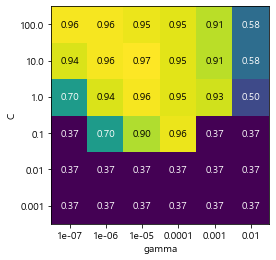

In [158]:
scores = np.array(results.mean_test_score).reshape(6, 6)

# 교차 검증 평균 점수 히트맵 그래프
mglearn.tools.heatmap(scores, xlabel='gamma', xticklabels=param_grid['gamma'],
                      ylabel='C', yticklabels=param_grid['C'], cmap="viridis")
plt.show()

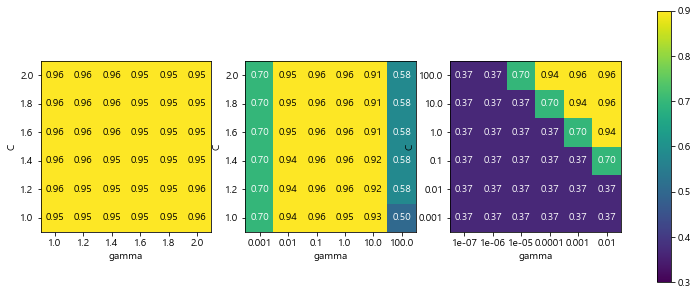

In [159]:
fig, axes = plt.subplots(1, 3, figsize=(13, 5))

#변화가 거의 없다 파라미터를 잘못 조정
param_grid_linear = {'C': np.linspace(1, 2, 6), 
                     'gamma':  np.linspace(1, 2, 6)}
#감마만 영향을 잘주는 케이스, C가 잘못설정되었거나 중요하지 않은 매개변수
param_grid_one_log = {'C': np.linspace(1, 2, 6),
                     'gamma':  np.logspace(-3, 2, 6)}
 
param_grid_range = {'C': np.logspace(-3, 2, 6),
                     'gamma':  np.logspace(-7, -2, 6)}

for param_grid, ax in zip([param_grid_linear, param_grid_one_log,
                           param_grid_range], axes):
    grid_search = GridSearchCV(SVC(), param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    scores = grid_search.cv_results_['mean_test_score'].reshape(6, 6)

    # 교차 검증 평균 점수의 히트맵 그래프
    scores_image = mglearn.tools.heatmap(
        scores, xlabel='gamma', ylabel='C', xticklabels=param_grid['gamma'],
        yticklabels=param_grid['C'], cmap="viridis", ax=ax, vmin=0.3, vmax=0.9)
    
plt.colorbar(scores_image, ax=axes.tolist())
plt.show() 

In [161]:
param_grid = [{'kernel': ['rbf'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100],
               'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
              {'kernel': ['linear'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100]}]
print("그리드 목록:\n", param_grid)

grid_search = GridSearchCV(SVC(), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)
print("최적 파라미터:", grid_search.best_params_)
print("최고 교차 검증 점수: {:.2f}".format(grid_search.best_score_))

그리드 목록:
 [{'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}, {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}]
최적 파라미터: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
최고 교차 검증 점수: 0.97


In [163]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

#중첩 교차 검증
scores = cross_val_score(GridSearchCV(SVC(), param_grid, cv=5),
                         iris.data, iris.target, cv=5)
print("교차 검증 점수: ", scores)
print("교차 검증 평균 점수: ", scores.mean())

교차 검증 점수:  [0.967 1.    0.967 0.967 1.   ]
교차 검증 평균 점수:  0.9800000000000001


In [167]:
def nested_cv(X, y, inner_cv, outer_cv, Classifier, parameter_grid):
    outer_scores = []
    # outer_cv의 분할을 순회하는 for 루프
    # (split 메소드는 훈련과 테스트 세트에 해당하는 인덱스를 리턴합니다)
    for training_samples, test_samples in outer_cv.split(X, y):
        # 최적의 매개변수를 찾습니다
        best_parms = {}
        best_score = -np.inf
        # 매개변수 그리드를 순회합니다
        for parameters in parameter_grid:
            # 안쪽 교차 검증의 점수를 기록합니다
            cv_scores = []
            # inner_cv의 분할을 순회하는 for 루프
            for inner_train, inner_test in inner_cv.split(
                    X[training_samples], y[training_samples]):
                # 훈련 데이터와 주어진 매개변수로 분류기를 만듭니다
                clf = Classifier(**parameters)
                clf.fit(X[inner_train], y[inner_train])
                # 검증 세트로 평가합니다
                score = clf.score(X[inner_test], y[inner_test])
                cv_scores.append(score)
            # 안쪽 교차 검증의 평균 점수를 계산합니다
            mean_score = np.mean(cv_scores)
            if mean_score > best_score:
                # 점수가 더 높은면 매개변수와 함께 기록합니다
                best_score = mean_score
                best_params = parameters
        # 바깥쪽 훈련 데이터 전체를 사용해 분류기를 만듭니다
        clf = Classifier(**best_params)
        clf.fit(X[training_samples], y[training_samples])
        # 테스트 세트를 사용해 평가합니다
        outer_scores.append(clf.score(X[test_samples], y[test_samples]))
    return np.array(outer_scores)

In [165]:
from sklearn.model_selection import ParameterGrid, StratifiedKFold
scores = nested_cv(iris.data, iris.target, StratifiedKFold(5),
                   StratifiedKFold(5), SVC, ParameterGrid(param_grid))
print("교차 검증 점수:", scores)

교차 검증 점수: [0.967 1.    0.967 0.967 1.   ]


In [168]:
from sklearn.datasets import load_digits

digits = load_digits()
y = digits.target == 9

X_train, X_test, y_train, y_test = train_test_split(
    digits.data, y, random_state=0)

In [169]:
from sklearn.dummy import DummyClassifier
dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
pred_most_frequent = dummy_majority.predict(X_test)
print("예측된 레이블의 고유값:", np.unique(pred_most_frequent))
print("테스트 점수: {:.2f}".format(dummy_majority.score(X_test, y_test)))

예측된 레이블의 고유값: [False]
테스트 점수: 0.90


In [172]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
pred_tree = tree.predict(X_test)
print("테스트 점수: {:.2f}".format(tree.score(X_test, y_test)))


dummy = DummyClassifier(strategy='stratified').fit(X_train, y_train)
pred_dummy = dummy.predict(X_test)
print("dummy 점수: {:.2f}".format(dummy.score(X_test, y_test)))

테스트 점수: 0.92
dummy 점수: 0.81


In [173]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(C=0.1, max_iter=1000).fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)
print("logreg 점수: {:.2f}".format(logreg.score(X_test, y_test)))

logreg 점수: 0.98


In [174]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, pred_logreg)
print("오차 행렬:\n", confusion)

오차 행렬:
 [[402   1]
 [  6  41]]


In [178]:
# F = 2(정밀도 * 재현율)/ (정밀도 + 재현율)
from sklearn.metrics import f1_score
print("빈도 기반 더미 모델의 f1 score: {:.2f}".format(
    f1_score(y_test, pred_most_frequent)))
print("무작위 더미 모델의 f1 score: {:.2f}".format(f1_score(y_test, pred_dummy)))
print("트리 모델의 f1 score: {:.2f}".format(f1_score(y_test, pred_tree)))
print("로지스틱 회귀 모델의 f1 score: {:.2f}".format(
    f1_score(y_test, pred_logreg)))

빈도 기반 더미 모델의 f1 score: 0.00
무작위 더미 모델의 f1 score: 0.08
트리 모델의 f1 score: 0.55
로지스틱 회귀 모델의 f1 score: 0.92


In [180]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_most_frequent,
                            target_names=["9 아님", "9"]))

              precision    recall  f1-score   support

        9 아님       0.90      1.00      0.94       403
           9       0.00      0.00      0.00        47

    accuracy                           0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.80      0.90      0.85       450



In [181]:
print(classification_report(y_test, pred_dummy,
                            target_names=["9 아님", "9"]))
print(classification_report(y_test, pred_logreg,
                            target_names=["9 아님", "9"]))

              precision    recall  f1-score   support

        9 아님       0.89      0.88      0.89       403
           9       0.08      0.09      0.08        47

    accuracy                           0.80       450
   macro avg       0.48      0.48      0.48       450
weighted avg       0.81      0.80      0.80       450

              precision    recall  f1-score   support

        9 아님       0.99      1.00      0.99       403
           9       0.98      0.87      0.92        47

    accuracy                           0.98       450
   macro avg       0.98      0.93      0.96       450
weighted avg       0.98      0.98      0.98       450



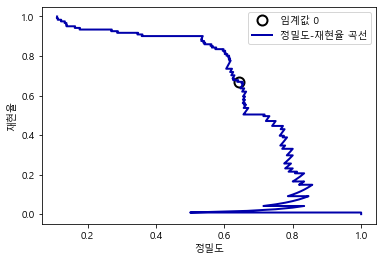

In [190]:
# 부드러운 곡선을 위해 데이터 포인트 수를 늘립니다
X, y = make_blobs(n_samples=(4000, 500), cluster_std=[7.0, 2], random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

svc = SVC(gamma=.05).fit(X_train, y_train)

precision, recall, thresholds = precision_recall_curve(
    y_test, svc.decision_function(X_test))
# 0에 가까운 임계값을 찾습니다
close_zero = np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="임계값 0", fillstyle="none", c='k', mew=2)

plt.plot(precision, recall, label="정밀도-재현율 곡선")
plt.xlabel("정밀도")
plt.ylabel("재현율")
plt.legend(loc="best")
plt.show() 

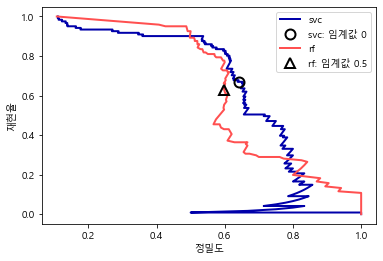

In [191]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=0, max_features=2)
rf.fit(X_train, y_train)

# RandomForestClassifier는 decision_function 대신 predict_proba를 제공합니다.
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(
    y_test, rf.predict_proba(X_test)[:, 1])

plt.plot(precision, recall, label="svc")

plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="svc: 임계값 0", fillstyle="none", c='k', mew=2)

plt.plot(precision_rf, recall_rf, label="rf")

close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(precision_rf[close_default_rf], recall_rf[close_default_rf], '^', c='k',
         markersize=10, label="rf: 임계값 0.5", fillstyle="none", mew=2)
plt.xlabel("정밀도")
plt.ylabel("재현율")
plt.legend(loc="best")
plt.show()

In [192]:
from sklearn.metrics import average_precision_score
ap_rf = average_precision_score(y_test, rf.predict_proba(X_test)[:, 1])
ap_svc = average_precision_score(y_test, svc.decision_function(X_test))
print("랜덤 포레스트의 평균 정밀도: {:.3f}".format(ap_rf))
print("svc의 평균 정밀도: {:.3f}".format(ap_svc))

랜덤 포레스트의 평균 정밀도: 0.660
svc의 평균 정밀도: 0.666


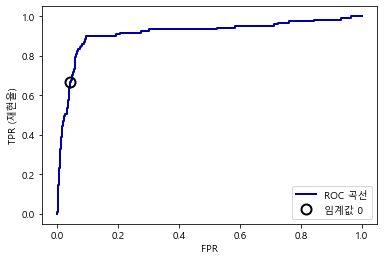

In [193]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, svc.decision_function(X_test))

plt.plot(fpr, tpr, label="ROC 곡선")
plt.xlabel("FPR")
plt.ylabel("TPR (재현율)")
# 0 근처의 임계값을 찾습니다
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
         label="임계값 0", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)
plt.show() 

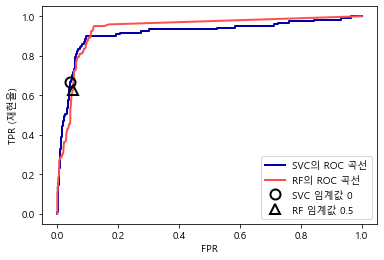

In [194]:
from sklearn.metrics import roc_curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])

plt.plot(fpr, tpr, label="SVC의 ROC 곡선")
plt.plot(fpr_rf, tpr_rf, label="RF의 ROC 곡선")

plt.xlabel("FPR")
plt.ylabel("TPR (재현율)")
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
         label="SVC 임계값 0", fillstyle="none", c='k', mew=2)
close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(fpr_rf[close_default_rf], tpr_rf[close_default_rf], '^', markersize=10,
         label="RF 임계값 0.5", fillstyle="none", c='k', mew=2)

plt.legend(loc=4)
plt.show() 

In [195]:
from sklearn.metrics import roc_auc_score
rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
svc_auc = roc_auc_score(y_test, svc.decision_function(X_test))
print("랜덤 포레스트의 AUC: {:.3f}".format(rf_auc))
print("SVC의 AUC: {:.3f}".format(svc_auc))

랜덤 포레스트의 AUC: 0.937
SVC의 AUC: 0.916


gamma = 1.00  정확도 = 0.90  AUC = 0.50
gamma = 0.10  정확도 = 0.90  AUC = 0.96
gamma = 0.01  정확도 = 0.90  AUC = 1.00


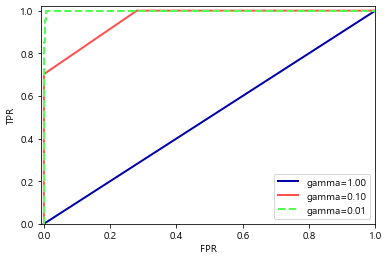

In [196]:
y = digits.target == 9

X_train, X_test, y_train, y_test = train_test_split(
    digits.data, y, random_state=0)

plt.figure()

for gamma in [1, 0.1, 0.01]:
    svc = SVC(gamma=gamma).fit(X_train, y_train)
    accuracy = svc.score(X_test, y_test)
    auc = roc_auc_score(y_test, svc.decision_function(X_test))
    fpr, tpr, _ = roc_curve(y_test , svc.decision_function(X_test))
    print("gamma = {:.2f}  정확도 = {:.2f}  AUC = {:.2f}".format(
        gamma, accuracy, auc))
    plt.plot(fpr, tpr, label="gamma={:.2f}".format(gamma))
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.xlim(-0.01, 1)
plt.ylim(0, 1.02)
plt.legend(loc="best")
plt.show() 
#감마에 따른 정확도는 똑같지만 실제로 보면 재현율이 다르다

In [199]:
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target, random_state=0)
lr = LogisticRegression(max_iter=5000).fit(X_train, y_train)
pred = lr.predict(X_test)
print("정확도: {:.3f}".format(accuracy_score(y_test, pred)))
print("오차 행렬:\n", confusion_matrix(y_test, pred))

정확도: 0.953
오차 행렬:
 [[37  0  0  0  0  0  0  0  0  0]
 [ 0 40  0  0  0  0  0  0  2  1]
 [ 0  0 41  3  0  0  0  0  0  0]
 [ 0  0  0 44  0  0  0  0  1  0]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  0 46  0  0  0  2]
 [ 0  1  0  0  0  0 51  0  0  0]
 [ 0  0  0  1  1  0  0 46  0  0]
 [ 0  3  1  0  0  0  1  0 43  0]
 [ 0  0  0  0  0  1  0  0  2 44]]


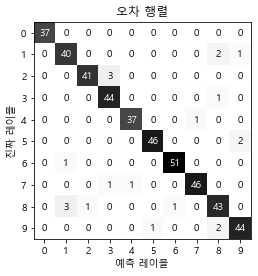

In [200]:
scores_image = mglearn.tools.heatmap(
    confusion_matrix(y_test, pred), xlabel='예측 레이블',
    ylabel='진짜 레이블', xticklabels=digits.target_names,
    yticklabels=digits.target_names, cmap=plt.cm.gray_r, fmt="%d")    
plt.title("오차 행렬")
plt.gca().invert_yaxis()

In [201]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.91      0.93      0.92        43
           2       0.98      0.93      0.95        44
           3       0.92      0.98      0.95        45
           4       0.97      0.97      0.97        38
           5       0.98      0.96      0.97        48
           6       0.98      0.98      0.98        52
           7       0.98      0.96      0.97        48
           8       0.90      0.90      0.90        48
           9       0.94      0.94      0.94        47

    accuracy                           0.95       450
   macro avg       0.95      0.95      0.95       450
weighted avg       0.95      0.95      0.95       450



In [202]:
print("micro 평균 f1 점수: {:.3f}".format(f1_score(y_test, pred, average="micro")))
print("macro 평균 f1 점수: {:.3f}".format(f1_score(y_test, pred, average="macro")))

micro 평균 f1 점수: 0.953
macro 평균 f1 점수: 0.954


In [204]:
# 분류의 기본 평가 지표는 정확도
print("기본 평가 지표:",
      cross_val_score(SVC(), digits.data, digits.target == 9, cv=5))
# scoring="accuracy"의 결과는 동일
explicit_accuracy =  cross_val_score(SVC(), digits.data, digits.target == 9,
                                     scoring="accuracy", cv=5)
print("정확도 지표:", explicit_accuracy)

roc_auc =  cross_val_score(SVC(), digits.data, digits.target == 9,
                           scoring="roc_auc")
print("AUC 지표:", roc_auc)

ap =  cross_val_score(SVC(), digits.data, digits.target == 9,
                           scoring="average_precision", cv=5)
print("평균 정밀도 지표:", ap)

기본 평가 지표: [0.975 0.992 1.    0.994 0.981]
정확도 지표: [0.975 0.992 1.    0.994 0.981]
AUC 지표: [0.997 0.999 1.    1.    0.984]
평균 정밀도 지표: [0.976 0.989 1.    0.999 0.95 ]


In [207]:
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target == 9, random_state=0)

# 일부러 적절하지 않은 그리드를 만듬
param_grid = {'gamma': [0.0001, 0.01, 0.1, 1, 10]}
# 기본 정확도 측정 지표를 사용
grid = GridSearchCV(SVC(), param_grid=param_grid, scoring = "roc_auc")
grid.fit(X_train, y_train)
print("정확도 지표를 사용한 그리드 서치")
print("최적의 파라미터:", grid.best_params_)
print("최상의 교차 검증 점수 (정확도)): {:.3f}".format(grid.best_score_))
print("테스트 세트 평균 정밀도: {:.3f}".format(
      average_precision_score(y_test, grid.decision_function(X_test))))
print("테스트 세트 정확도: {:.3f}".format(
      accuracy_score(y_test, grid.predict(X_test))))

정확도 지표를 사용한 그리드 서치
최적의 파라미터: {'gamma': 0.01}
최상의 교차 검증 점수 (정확도)): 0.998
테스트 세트 평균 정밀도: 0.996
테스트 세트 정확도: 0.896
